In [2]:
# Purpose of this Python script is to better understand the mechanics of neural networks, in this case the Artificial Neural Network (ANN) approach.
# The application I have chosen is one that matches my background very well: economics and finance
# Objective is to predict the level of S&P 500 by using various economic indicators on a quarterly lag
# The reality is that predicting the S&P 500 is nearly impossible, which lends credit to the theory of a random walk

# The code was largely leveraged following the steps outlined in the following article:
# https://towardsdatascience.com/how-to-convert-pandas-dataframe-to-keras-rnn-and-back-to-pandas-for-multivariate-regression-dcc34c991df9

In [3]:
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow import keras
#from keras.models import Sequential
#from keras.layers import Dropout
#from keras.layers import Dense
#from keras.layers import LSTM




E:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
E:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is de

In [4]:
# Collecting economic data from FRED and SPY price data from Yahoo Finance

In [5]:
start = datetime.datetime(1975, 1, 1)

end = datetime.datetime(2020, 10, 1)

variables = ['T10Y2Y', 'HOUST', 'PPIACO', 'BAMLH0A0HYM2', 'TEDRATE', 'UNRATE']
data = web.DataReader(variables, 'fred', start, end)
data = data.dropna()


df = web.DataReader('SPY','yahoo', start, end).reset_index()
df.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis = 1, inplace = True)

dataset = pd.merge(data, df, left_on = 'DATE', right_on = 'Date')

for column in dataset[variables]:
   # Select column contents by column name using [] operator
   dataset[column] = dataset[column].shift(periods = 1)
   

dataset = dataset.dropna()

print(dataset)







     T10Y2Y   HOUST  PPIACO  BAMLH0A0HYM2  TEDRATE  UNRATE       Date  \
1      0.48  1492.0   127.0          2.90     0.63     5.1 1997-05-01   
2      0.42  1442.0   127.4          2.91     0.71     4.9 1997-07-01   
3      0.43  1437.0   126.9          2.70     0.77     4.9 1997-08-01   
4      0.31  1390.0   127.2          2.57     0.55     4.8 1997-10-01   
5      0.29  1520.0   127.8          2.63     0.80     4.7 1997-12-01   
..      ...     ...     ...           ...      ...     ...        ...   
170    0.17  1371.0   199.0          4.09     0.40     3.5 2020-04-01   
171    0.39   934.0   185.5          9.11     1.35    14.7 2020-05-01   
172    0.44  1038.0   188.6          7.70     0.42    13.3 2020-06-01   
173    0.52  1265.0   191.1          6.43     0.20    11.1 2020-07-01   
174    0.52  1487.0   192.9          6.33     0.16    10.2 2020-09-01   

          Close  
1     80.000000  
2     89.343750  
3     94.937500  
4     95.625000  
5     98.093750  
..          ...

In [6]:
# Dropping the output column

In [7]:
X = dataset.iloc[:, :-2].values
y = dataset.iloc[:, -1].values
print(X)
print(y)


[[4.800e-01 1.492e+03 1.270e+02 2.900e+00 6.300e-01 5.100e+00]
 [4.200e-01 1.442e+03 1.274e+02 2.910e+00 7.100e-01 4.900e+00]
 [4.300e-01 1.437e+03 1.269e+02 2.700e+00 7.700e-01 4.900e+00]
 ...
 [4.400e-01 1.038e+03 1.886e+02 7.700e+00 4.200e-01 1.330e+01]
 [5.200e-01 1.265e+03 1.911e+02 6.430e+00 2.000e-01 1.110e+01]
 [5.200e-01 1.487e+03 1.929e+02 6.330e+00 1.600e-01 1.020e+01]]
[ 80.          89.34375     94.9375      95.625       98.09375
 110.828125   112.59375    109.53125    114.625      100.0625
  98.8125     117.625      126.90625    123.90625    129.34375
 129.75       138.03125    133.6875     128.46875    135.5625
 140.40625    140.9375     138.4375     145.3125     143.875
 152.5        142.46875    132.21875    137.92999268 124.59999847
 127.05000305 126.73000336 122.11000061 104.26999664 108.51000214
 112.65000153 113.73999786 109.18000031  97.02999878  88.77999878
  85.72000122  90.26999664  86.04000092  91.90000153  98.52999878
  98.51000214 102.08000183 107.59999847 1

In [8]:
# Defining the training and test data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
# Initializing the ANN

In [11]:
ann = tf.keras.models.Sequential()


In [12]:
# Adding the input layer 

In [13]:
ann.add(tf.keras.layers.Dense(units = 3, activation = 'relu'))
ann.add(keras.layers.Dropout(rate = 0.2))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
# Adding the second through nth hidden layers

In [15]:
ann.add(tf.keras.layers.Dense(units = 10, activation = 'relu'))
ann.add(keras.layers.Dropout(rate = 0.2))

ann.add(tf.keras.layers.Dense(units = 10, activation = 'relu'))
ann.add(keras.layers.Dropout(rate = 0.2))



In [16]:
# Adding the output layer

In [17]:
ann.add(tf.keras.layers.Dense(units = 1))

In [18]:
# Compiling the ANN

In [19]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
# Training the ANN on the Training set

In [21]:
ann.fit(X_train, y_train, batch_size = 5, epochs = 3500)

Epoch 1/3500
139/139 [==============================] - 0s 1ms/sample - loss: 1214057.0301
Epoch 2/3500
139/139 [==============================] - 0s 135us/sample - loss: 630486.0393
Epoch 3/3500
139/139 [==============================] - 0s 134us/sample - loss: 310899.8605
Epoch 4/3500
139/139 [==============================] - 0s 129us/sample - loss: 301348.8377
Epoch 5/3500
139/139 [==============================] - 0s 115us/sample - loss: 140084.8939
Epoch 6/3500
139/139 [==============================] - 0s 120us/sample - loss: 139008.8143
Epoch 7/3500
139/139 [==============================] - 0s 118us/sample - loss: 111721.8996
Epoch 8/3500
139/139 [==============================] - 0s 126us/sample - loss: 104804.6578
Epoch 9/3500
139/139 [==============================] - 0s 130us/sample - loss: 86290.3586
Epoch 10/3500
139/139 [==============================] - 0s 127us/sample - loss: 61861.3183
Epoch 11/3500
139/139 [==============================] - 0s 131us/sample - loss: 5

139/139 [==============================] - 0s 138us/sample - loss: 14610.5288
Epoch 91/3500
139/139 [==============================] - 0s 128us/sample - loss: 12718.2967
Epoch 92/3500
139/139 [==============================] - 0s 133us/sample - loss: 12912.6805
Epoch 93/3500
139/139 [==============================] - 0s 137us/sample - loss: 13505.1670
Epoch 94/3500
139/139 [==============================] - 0s 130us/sample - loss: 10797.5138
Epoch 95/3500
139/139 [==============================] - 0s 133us/sample - loss: 12992.1564
Epoch 96/3500
139/139 [==============================] - 0s 135us/sample - loss: 14317.3597
Epoch 97/3500
139/139 [==============================] - 0s 124us/sample - loss: 13645.7468
Epoch 98/3500
139/139 [==============================] - 0s 128us/sample - loss: 11540.2787
Epoch 99/3500
139/139 [==============================] - 0s 132us/sample - loss: 13682.5808
Epoch 100/3500
139/139 [==============================] - 0s 125us/sample - loss: 16185.4109
E

139/139 [==============================] - 0s 131us/sample - loss: 9858.3365
Epoch 179/3500
139/139 [==============================] - 0s 134us/sample - loss: 10018.8736
Epoch 180/3500
139/139 [==============================] - 0s 130us/sample - loss: 11227.1317
Epoch 181/3500
139/139 [==============================] - 0s 126us/sample - loss: 11033.4976
Epoch 182/3500
139/139 [==============================] - 0s 129us/sample - loss: 11184.2809
Epoch 183/3500
139/139 [==============================] - 0s 136us/sample - loss: 10143.4141
Epoch 184/3500
139/139 [==============================] - 0s 129us/sample - loss: 11074.7969
Epoch 185/3500
139/139 [==============================] - 0s 126us/sample - loss: 9997.3484
Epoch 186/3500
139/139 [==============================] - 0s 135us/sample - loss: 11258.9891
Epoch 187/3500
139/139 [==============================] - 0s 131us/sample - loss: 10423.8159
Epoch 188/3500
139/139 [==============================] - 0s 124us/sample - loss: 9582.

139/139 [==============================] - 0s 129us/sample - loss: 8270.1819
Epoch 267/3500
139/139 [==============================] - 0s 132us/sample - loss: 9493.9962
Epoch 268/3500
139/139 [==============================] - 0s 133us/sample - loss: 7813.1089
Epoch 269/3500
139/139 [==============================] - 0s 130us/sample - loss: 9415.0274
Epoch 270/3500
139/139 [==============================] - 0s 128us/sample - loss: 8086.9995
Epoch 271/3500
139/139 [==============================] - 0s 127us/sample - loss: 7118.9586
Epoch 272/3500
139/139 [==============================] - 0s 123us/sample - loss: 7567.7216
Epoch 273/3500
139/139 [==============================] - 0s 125us/sample - loss: 9107.9201
Epoch 274/3500
139/139 [==============================] - 0s 126us/sample - loss: 8692.9056
Epoch 275/3500
139/139 [==============================] - 0s 124us/sample - loss: 7945.2143
Epoch 276/3500
139/139 [==============================] - 0s 130us/sample - loss: 7947.3926
Epo

139/139 [==============================] - 0s 120us/sample - loss: 6595.9645
Epoch 356/3500
139/139 [==============================] - 0s 130us/sample - loss: 5790.5143
Epoch 357/3500
139/139 [==============================] - 0s 126us/sample - loss: 5254.6797
Epoch 358/3500
139/139 [==============================] - 0s 129us/sample - loss: 6780.0206
Epoch 359/3500
139/139 [==============================] - 0s 130us/sample - loss: 6284.1644
Epoch 360/3500
139/139 [==============================] - 0s 129us/sample - loss: 9083.9938
Epoch 361/3500
139/139 [==============================] - 0s 132us/sample - loss: 6183.5264
Epoch 362/3500
139/139 [==============================] - 0s 131us/sample - loss: 7792.1438
Epoch 363/3500
139/139 [==============================] - 0s 123us/sample - loss: 5978.6147
Epoch 364/3500
139/139 [==============================] - 0s 129us/sample - loss: 8689.7822
Epoch 365/3500
139/139 [==============================] - 0s 129us/sample - loss: 6800.0917
Epo

Epoch 444/3500
139/139 [==============================] - 0s 127us/sample - loss: 4682.7511
Epoch 445/3500
139/139 [==============================] - 0s 131us/sample - loss: 4120.2929
Epoch 446/3500
139/139 [==============================] - 0s 128us/sample - loss: 4509.4928
Epoch 447/3500
139/139 [==============================] - 0s 135us/sample - loss: 4682.5241
Epoch 448/3500
139/139 [==============================] - 0s 135us/sample - loss: 4366.8010
Epoch 449/3500
139/139 [==============================] - 0s 120us/sample - loss: 3029.2643
Epoch 450/3500
139/139 [==============================] - 0s 133us/sample - loss: 4959.2944
Epoch 451/3500
139/139 [==============================] - 0s 127us/sample - loss: 5101.8141
Epoch 452/3500
139/139 [==============================] - 0s 125us/sample - loss: 4350.1884
Epoch 453/3500
139/139 [==============================] - 0s 128us/sample - loss: 5098.7674
Epoch 454/3500
139/139 [==============================] - 0s 131us/sample - loss

139/139 [==============================] - 0s 126us/sample - loss: 3636.1481
Epoch 534/3500
139/139 [==============================] - 0s 128us/sample - loss: 4385.4196
Epoch 535/3500
139/139 [==============================] - 0s 127us/sample - loss: 3956.1133
Epoch 536/3500
139/139 [==============================] - 0s 124us/sample - loss: 4194.3056
Epoch 537/3500
139/139 [==============================] - 0s 129us/sample - loss: 4301.8855
Epoch 538/3500
139/139 [==============================] - 0s 120us/sample - loss: 4281.2673
Epoch 539/3500
139/139 [==============================] - 0s 126us/sample - loss: 4691.9506
Epoch 540/3500
139/139 [==============================] - 0s 130us/sample - loss: 4992.9496
Epoch 541/3500
139/139 [==============================] - 0s 124us/sample - loss: 4139.6282
Epoch 542/3500
139/139 [==============================] - 0s 132us/sample - loss: 4840.0998
Epoch 543/3500
139/139 [==============================] - 0s 120us/sample - loss: 4470.9857
Epo

139/139 [==============================] - 0s 129us/sample - loss: 3469.5906
Epoch 623/3500
139/139 [==============================] - 0s 130us/sample - loss: 3251.5817
Epoch 624/3500
139/139 [==============================] - 0s 129us/sample - loss: 4162.4712
Epoch 625/3500
139/139 [==============================] - 0s 132us/sample - loss: 3793.7312
Epoch 626/3500
139/139 [==============================] - 0s 121us/sample - loss: 3574.9925
Epoch 627/3500
139/139 [==============================] - 0s 127us/sample - loss: 5060.4535
Epoch 628/3500
139/139 [==============================] - 0s 130us/sample - loss: 3755.2346
Epoch 629/3500
139/139 [==============================] - 0s 125us/sample - loss: 3689.9913
Epoch 630/3500
139/139 [==============================] - 0s 129us/sample - loss: 3233.7576
Epoch 631/3500
139/139 [==============================] - 0s 129us/sample - loss: 4068.7289
Epoch 632/3500
139/139 [==============================] - 0s 122us/sample - loss: 4626.5541
Epo

139/139 [==============================] - 0s 136us/sample - loss: 3382.4105
Epoch 712/3500
139/139 [==============================] - 0s 127us/sample - loss: 3610.0188
Epoch 713/3500
139/139 [==============================] - 0s 131us/sample - loss: 4257.5942
Epoch 714/3500
139/139 [==============================] - 0s 135us/sample - loss: 3482.0029
Epoch 715/3500
139/139 [==============================] - 0s 128us/sample - loss: 3753.5714
Epoch 716/3500
139/139 [==============================] - 0s 130us/sample - loss: 3814.5255
Epoch 717/3500
139/139 [==============================] - 0s 126us/sample - loss: 3454.2261
Epoch 718/3500
139/139 [==============================] - 0s 130us/sample - loss: 3518.0468
Epoch 719/3500
139/139 [==============================] - 0s 119us/sample - loss: 3604.9947
Epoch 720/3500
139/139 [==============================] - 0s 129us/sample - loss: 2810.4148
Epoch 721/3500
139/139 [==============================] - 0s 130us/sample - loss: 3141.7090
Epo

139/139 [==============================] - 0s 129us/sample - loss: 3840.4178
Epoch 801/3500
139/139 [==============================] - 0s 129us/sample - loss: 3957.5724
Epoch 802/3500
139/139 [==============================] - 0s 126us/sample - loss: 3286.8043
Epoch 803/3500
139/139 [==============================] - 0s 122us/sample - loss: 3455.1647
Epoch 804/3500
139/139 [==============================] - 0s 132us/sample - loss: 3228.1414
Epoch 805/3500
139/139 [==============================] - 0s 126us/sample - loss: 4132.7825
Epoch 806/3500
139/139 [==============================] - 0s 128us/sample - loss: 3266.4189
Epoch 807/3500
139/139 [==============================] - 0s 126us/sample - loss: 4247.0549
Epoch 808/3500
139/139 [==============================] - 0s 127us/sample - loss: 3967.7981
Epoch 809/3500
139/139 [==============================] - 0s 125us/sample - loss: 4082.2723
Epoch 810/3500
139/139 [==============================] - 0s 121us/sample - loss: 3694.9205
Epo

139/139 [==============================] - 0s 137us/sample - loss: 3538.9110
Epoch 890/3500
139/139 [==============================] - 0s 130us/sample - loss: 3290.3783
Epoch 891/3500
139/139 [==============================] - 0s 138us/sample - loss: 3973.8432
Epoch 892/3500
139/139 [==============================] - 0s 123us/sample - loss: 3698.6445
Epoch 893/3500
139/139 [==============================] - 0s 137us/sample - loss: 3879.2774
Epoch 894/3500
139/139 [==============================] - 0s 135us/sample - loss: 3382.3435
Epoch 895/3500
139/139 [==============================] - 0s 135us/sample - loss: 3575.9498
Epoch 896/3500
139/139 [==============================] - 0s 133us/sample - loss: 3505.2869
Epoch 897/3500
139/139 [==============================] - 0s 133us/sample - loss: 3539.7385
Epoch 898/3500
139/139 [==============================] - 0s 130us/sample - loss: 3858.9931
Epoch 899/3500
139/139 [==============================] - 0s 130us/sample - loss: 3582.4659
Epo

Epoch 978/3500
139/139 [==============================] - 0s 138us/sample - loss: 3476.0220
Epoch 979/3500
139/139 [==============================] - 0s 130us/sample - loss: 3028.8656
Epoch 980/3500
139/139 [==============================] - 0s 124us/sample - loss: 3173.1707
Epoch 981/3500
139/139 [==============================] - 0s 127us/sample - loss: 3183.8590
Epoch 982/3500
139/139 [==============================] - 0s 130us/sample - loss: 2850.5096
Epoch 983/3500
139/139 [==============================] - 0s 130us/sample - loss: 3149.5271
Epoch 984/3500
139/139 [==============================] - 0s 127us/sample - loss: 3659.3341
Epoch 985/3500
139/139 [==============================] - 0s 133us/sample - loss: 3084.4515
Epoch 986/3500
139/139 [==============================] - 0s 128us/sample - loss: 3307.6769
Epoch 987/3500
139/139 [==============================] - 0s 127us/sample - loss: 3512.0099
Epoch 988/3500
139/139 [==============================] - 0s 128us/sample - loss

139/139 [==============================] - 0s 129us/sample - loss: 3335.2277
Epoch 1067/3500
139/139 [==============================] - 0s 135us/sample - loss: 3153.1678
Epoch 1068/3500
139/139 [==============================] - 0s 132us/sample - loss: 3014.2160
Epoch 1069/3500
139/139 [==============================] - 0s 124us/sample - loss: 3216.1230
Epoch 1070/3500
139/139 [==============================] - 0s 133us/sample - loss: 3758.3078
Epoch 1071/3500
139/139 [==============================] - 0s 127us/sample - loss: 3043.2383
Epoch 1072/3500
139/139 [==============================] - 0s 127us/sample - loss: 3074.9244
Epoch 1073/3500
139/139 [==============================] - 0s 136us/sample - loss: 2599.4044
Epoch 1074/3500
139/139 [==============================] - 0s 136us/sample - loss: 3582.0878
Epoch 1075/3500
139/139 [==============================] - 0s 131us/sample - loss: 3105.4405
Epoch 1076/3500
139/139 [==============================] - 0s 131us/sample - loss: 316

Epoch 1154/3500
139/139 [==============================] - 0s 128us/sample - loss: 3367.1950
Epoch 1155/3500
139/139 [==============================] - 0s 135us/sample - loss: 2906.2260
Epoch 1156/3500
139/139 [==============================] - 0s 127us/sample - loss: 2607.4536
Epoch 1157/3500
139/139 [==============================] - 0s 132us/sample - loss: 3156.8417
Epoch 1158/3500
139/139 [==============================] - 0s 151us/sample - loss: 2955.5922
Epoch 1159/3500
139/139 [==============================] - 0s 136us/sample - loss: 3035.9404
Epoch 1160/3500
139/139 [==============================] - 0s 129us/sample - loss: 2564.4502
Epoch 1161/3500
139/139 [==============================] - 0s 130us/sample - loss: 3047.4322
Epoch 1162/3500
139/139 [==============================] - 0s 130us/sample - loss: 3398.3975
Epoch 1163/3500
139/139 [==============================] - 0s 133us/sample - loss: 2921.3034
Epoch 1164/3500
139/139 [==============================] - ETA: 0s - l

139/139 [==============================] - 0s 135us/sample - loss: 2963.0023
Epoch 1242/3500
139/139 [==============================] - 0s 127us/sample - loss: 3008.3364
Epoch 1243/3500
139/139 [==============================] - 0s 134us/sample - loss: 2530.8362
Epoch 1244/3500
139/139 [==============================] - 0s 127us/sample - loss: 2921.3867
Epoch 1245/3500
139/139 [==============================] - 0s 126us/sample - loss: 2125.1196
Epoch 1246/3500
139/139 [==============================] - 0s 125us/sample - loss: 2855.3150
Epoch 1247/3500
139/139 [==============================] - 0s 127us/sample - loss: 2864.2908
Epoch 1248/3500
139/139 [==============================] - 0s 135us/sample - loss: 2646.2864
Epoch 1249/3500
139/139 [==============================] - 0s 136us/sample - loss: 3163.9044
Epoch 1250/3500
139/139 [==============================] - 0s 124us/sample - loss: 2649.8223
Epoch 1251/3500
139/139 [==============================] - 0s 128us/sample - loss: 352

139/139 [==============================] - 0s 130us/sample - loss: 2824.6156
Epoch 1330/3500
139/139 [==============================] - 0s 132us/sample - loss: 3166.2379
Epoch 1331/3500
139/139 [==============================] - 0s 128us/sample - loss: 2858.9481
Epoch 1332/3500
139/139 [==============================] - 0s 132us/sample - loss: 3106.0113
Epoch 1333/3500
139/139 [==============================] - 0s 136us/sample - loss: 3191.1705
Epoch 1334/3500
139/139 [==============================] - 0s 134us/sample - loss: 3175.5324
Epoch 1335/3500
139/139 [==============================] - 0s 128us/sample - loss: 3322.5228
Epoch 1336/3500
139/139 [==============================] - 0s 126us/sample - loss: 2837.5178
Epoch 1337/3500
139/139 [==============================] - 0s 129us/sample - loss: 2493.8031
Epoch 1338/3500
139/139 [==============================] - 0s 124us/sample - loss: 2441.8707
Epoch 1339/3500
139/139 [==============================] - 0s 135us/sample - loss: 270

139/139 [==============================] - 0s 130us/sample - loss: 3296.4848
Epoch 1418/3500
139/139 [==============================] - 0s 135us/sample - loss: 3313.0733
Epoch 1419/3500
139/139 [==============================] - 0s 132us/sample - loss: 2915.3874
Epoch 1420/3500
139/139 [==============================] - 0s 128us/sample - loss: 2741.5374
Epoch 1421/3500
139/139 [==============================] - 0s 126us/sample - loss: 3040.4472
Epoch 1422/3500
139/139 [==============================] - 0s 128us/sample - loss: 2690.4664
Epoch 1423/3500
139/139 [==============================] - 0s 129us/sample - loss: 3193.1512
Epoch 1424/3500
139/139 [==============================] - 0s 128us/sample - loss: 2754.9412
Epoch 1425/3500
139/139 [==============================] - 0s 139us/sample - loss: 2812.5685
Epoch 1426/3500
139/139 [==============================] - 0s 134us/sample - loss: 2684.9120
Epoch 1427/3500
139/139 [==============================] - 0s 132us/sample - loss: 368

139/139 [==============================] - 0s 125us/sample - loss: 2598.6930
Epoch 1506/3500
139/139 [==============================] - 0s 128us/sample - loss: 3319.1285
Epoch 1507/3500
139/139 [==============================] - 0s 124us/sample - loss: 3095.6076
Epoch 1508/3500
139/139 [==============================] - 0s 129us/sample - loss: 2553.6342
Epoch 1509/3500
139/139 [==============================] - 0s 133us/sample - loss: 2883.8043
Epoch 1510/3500
139/139 [==============================] - 0s 134us/sample - loss: 2685.3227
Epoch 1511/3500
139/139 [==============================] - 0s 123us/sample - loss: 2554.6966
Epoch 1512/3500
139/139 [==============================] - 0s 122us/sample - loss: 3095.0204
Epoch 1513/3500
139/139 [==============================] - 0s 130us/sample - loss: 2490.5389
Epoch 1514/3500
139/139 [==============================] - 0s 132us/sample - loss: 2524.3176
Epoch 1515/3500
139/139 [==============================] - 0s 125us/sample - loss: 380

139/139 [==============================] - 0s 124us/sample - loss: 2967.2030
Epoch 1594/3500
139/139 [==============================] - 0s 121us/sample - loss: 2736.7036
Epoch 1595/3500
139/139 [==============================] - 0s 127us/sample - loss: 3357.9119
Epoch 1596/3500
139/139 [==============================] - 0s 127us/sample - loss: 2843.3561
Epoch 1597/3500
139/139 [==============================] - 0s 128us/sample - loss: 2825.4794
Epoch 1598/3500
139/139 [==============================] - 0s 126us/sample - loss: 3274.0715
Epoch 1599/3500
139/139 [==============================] - 0s 127us/sample - loss: 3091.0057
Epoch 1600/3500
139/139 [==============================] - 0s 121us/sample - loss: 4211.8951
Epoch 1601/3500
139/139 [==============================] - 0s 123us/sample - loss: 2693.1909
Epoch 1602/3500
139/139 [==============================] - 0s 129us/sample - loss: 3440.2736
Epoch 1603/3500
139/139 [==============================] - 0s 122us/sample - loss: 319

139/139 [==============================] - 0s 132us/sample - loss: 2737.9025
Epoch 1682/3500
139/139 [==============================] - 0s 128us/sample - loss: 2705.6533
Epoch 1683/3500
139/139 [==============================] - 0s 128us/sample - loss: 2389.1257
Epoch 1684/3500
139/139 [==============================] - 0s 128us/sample - loss: 3107.6223
Epoch 1685/3500
139/139 [==============================] - 0s 130us/sample - loss: 2934.3927
Epoch 1686/3500
139/139 [==============================] - 0s 131us/sample - loss: 2920.7735
Epoch 1687/3500
139/139 [==============================] - 0s 121us/sample - loss: 2757.8232
Epoch 1688/3500
139/139 [==============================] - 0s 120us/sample - loss: 3503.9290
Epoch 1689/3500
139/139 [==============================] - 0s 126us/sample - loss: 2343.1005
Epoch 1690/3500
139/139 [==============================] - 0s 128us/sample - loss: 2727.3512
Epoch 1691/3500
139/139 [==============================] - 0s 129us/sample - loss: 261

139/139 [==============================] - 0s 129us/sample - loss: 2099.0579
Epoch 1770/3500
139/139 [==============================] - 0s 126us/sample - loss: 2882.0579
Epoch 1771/3500
139/139 [==============================] - 0s 124us/sample - loss: 2762.2114
Epoch 1772/3500
139/139 [==============================] - 0s 127us/sample - loss: 2790.9402
Epoch 1773/3500
139/139 [==============================] - 0s 134us/sample - loss: 2812.0187
Epoch 1774/3500
139/139 [==============================] - 0s 127us/sample - loss: 3393.1941
Epoch 1775/3500
139/139 [==============================] - 0s 131us/sample - loss: 2676.5431
Epoch 1776/3500
139/139 [==============================] - 0s 129us/sample - loss: 2651.8374
Epoch 1777/3500
139/139 [==============================] - 0s 125us/sample - loss: 2347.7740
Epoch 1778/3500
139/139 [==============================] - 0s 121us/sample - loss: 2498.6196
Epoch 1779/3500
139/139 [==============================] - 0s 127us/sample - loss: 212

139/139 [==============================] - 0s 128us/sample - loss: 2983.5405
Epoch 1858/3500
139/139 [==============================] - 0s 126us/sample - loss: 3099.2008
Epoch 1859/3500
139/139 [==============================] - 0s 129us/sample - loss: 2645.7317
Epoch 1860/3500
139/139 [==============================] - 0s 132us/sample - loss: 2949.9386
Epoch 1861/3500
139/139 [==============================] - 0s 123us/sample - loss: 2258.4289
Epoch 1862/3500
139/139 [==============================] - 0s 131us/sample - loss: 2439.4008
Epoch 1863/3500
139/139 [==============================] - 0s 132us/sample - loss: 2299.8703
Epoch 1864/3500
139/139 [==============================] - 0s 125us/sample - loss: 3419.6779
Epoch 1865/3500
139/139 [==============================] - 0s 126us/sample - loss: 3496.0194
Epoch 1866/3500
139/139 [==============================] - 0s 122us/sample - loss: 3652.1911
Epoch 1867/3500
139/139 [==============================] - 0s 120us/sample - loss: 333

139/139 [==============================] - 0s 125us/sample - loss: 3202.9745
Epoch 1946/3500
139/139 [==============================] - 0s 119us/sample - loss: 2537.6415
Epoch 1947/3500
139/139 [==============================] - 0s 121us/sample - loss: 2393.5471
Epoch 1948/3500
139/139 [==============================] - 0s 122us/sample - loss: 3369.1244
Epoch 1949/3500
139/139 [==============================] - 0s 122us/sample - loss: 2135.7160
Epoch 1950/3500
139/139 [==============================] - 0s 122us/sample - loss: 2676.0191
Epoch 1951/3500
139/139 [==============================] - 0s 125us/sample - loss: 2461.2804
Epoch 1952/3500
139/139 [==============================] - 0s 125us/sample - loss: 2603.4024
Epoch 1953/3500
139/139 [==============================] - 0s 128us/sample - loss: 3257.6381
Epoch 1954/3500
139/139 [==============================] - 0s 115us/sample - loss: 3134.0631
Epoch 1955/3500
139/139 [==============================] - 0s 122us/sample - loss: 251

139/139 [==============================] - 0s 121us/sample - loss: 2940.2576
Epoch 2034/3500
139/139 [==============================] - 0s 128us/sample - loss: 2736.0518
Epoch 2035/3500
139/139 [==============================] - 0s 130us/sample - loss: 2981.2666
Epoch 2036/3500
139/139 [==============================] - 0s 132us/sample - loss: 2332.0725
Epoch 2037/3500
139/139 [==============================] - 0s 126us/sample - loss: 2362.5977
Epoch 2038/3500
139/139 [==============================] - 0s 127us/sample - loss: 2381.1566
Epoch 2039/3500
139/139 [==============================] - 0s 120us/sample - loss: 2469.8002
Epoch 2040/3500
139/139 [==============================] - 0s 121us/sample - loss: 3049.6715
Epoch 2041/3500
139/139 [==============================] - 0s 123us/sample - loss: 2486.2192
Epoch 2042/3500
139/139 [==============================] - 0s 120us/sample - loss: 3571.5470
Epoch 2043/3500
139/139 [==============================] - 0s 127us/sample - loss: 297

139/139 [==============================] - 0s 126us/sample - loss: 2782.6471
Epoch 2122/3500
139/139 [==============================] - 0s 132us/sample - loss: 3127.6828
Epoch 2123/3500
139/139 [==============================] - 0s 127us/sample - loss: 2479.2425
Epoch 2124/3500
139/139 [==============================] - 0s 127us/sample - loss: 3074.8628
Epoch 2125/3500
139/139 [==============================] - 0s 124us/sample - loss: 2673.3728
Epoch 2126/3500
139/139 [==============================] - 0s 134us/sample - loss: 2326.7876
Epoch 2127/3500
139/139 [==============================] - 0s 137us/sample - loss: 2883.2579
Epoch 2128/3500
139/139 [==============================] - 0s 128us/sample - loss: 2609.8108
Epoch 2129/3500
139/139 [==============================] - 0s 123us/sample - loss: 3079.2583
Epoch 2130/3500
139/139 [==============================] - 0s 128us/sample - loss: 2392.5788
Epoch 2131/3500
139/139 [==============================] - 0s 120us/sample - loss: 279

139/139 [==============================] - 0s 120us/sample - loss: 2922.3844
Epoch 2210/3500
139/139 [==============================] - 0s 128us/sample - loss: 3448.2964
Epoch 2211/3500
139/139 [==============================] - 0s 126us/sample - loss: 2434.1379
Epoch 2212/3500
139/139 [==============================] - 0s 127us/sample - loss: 3129.9094
Epoch 2213/3500
139/139 [==============================] - 0s 126us/sample - loss: 3257.1028
Epoch 2214/3500
139/139 [==============================] - 0s 125us/sample - loss: 2712.8379
Epoch 2215/3500
139/139 [==============================] - 0s 121us/sample - loss: 2955.0249
Epoch 2216/3500
139/139 [==============================] - 0s 121us/sample - loss: 2953.9274
Epoch 2217/3500
139/139 [==============================] - 0s 123us/sample - loss: 2708.5212
Epoch 2218/3500
139/139 [==============================] - 0s 121us/sample - loss: 2891.9319
Epoch 2219/3500
139/139 [==============================] - 0s 131us/sample - loss: 326

139/139 [==============================] - 0s 121us/sample - loss: 2851.9917
Epoch 2298/3500
139/139 [==============================] - 0s 137us/sample - loss: 2658.0204
Epoch 2299/3500
139/139 [==============================] - 0s 127us/sample - loss: 3401.9954
Epoch 2300/3500
139/139 [==============================] - 0s 123us/sample - loss: 2924.2161
Epoch 2301/3500
139/139 [==============================] - 0s 137us/sample - loss: 2517.8861
Epoch 2302/3500
139/139 [==============================] - 0s 137us/sample - loss: 2653.0394
Epoch 2303/3500
139/139 [==============================] - 0s 135us/sample - loss: 2946.0057
Epoch 2304/3500
139/139 [==============================] - 0s 132us/sample - loss: 2960.2413
Epoch 2305/3500
139/139 [==============================] - 0s 136us/sample - loss: 2828.3499
Epoch 2306/3500
139/139 [==============================] - 0s 140us/sample - loss: 2708.7114
Epoch 2307/3500
139/139 [==============================] - 0s 134us/sample - loss: 187

139/139 [==============================] - 0s 127us/sample - loss: 2227.2168
Epoch 2386/3500
139/139 [==============================] - 0s 123us/sample - loss: 3057.9439
Epoch 2387/3500
139/139 [==============================] - 0s 124us/sample - loss: 2932.5451
Epoch 2388/3500
139/139 [==============================] - 0s 119us/sample - loss: 3134.5437
Epoch 2389/3500
139/139 [==============================] - 0s 131us/sample - loss: 3000.0025
Epoch 2390/3500
139/139 [==============================] - 0s 130us/sample - loss: 2749.3515
Epoch 2391/3500
139/139 [==============================] - 0s 124us/sample - loss: 2861.8823
Epoch 2392/3500
139/139 [==============================] - 0s 126us/sample - loss: 2412.8448
Epoch 2393/3500
139/139 [==============================] - 0s 126us/sample - loss: 3021.0982
Epoch 2394/3500
139/139 [==============================] - 0s 125us/sample - loss: 3364.5908
Epoch 2395/3500
139/139 [==============================] - 0s 125us/sample - loss: 288

139/139 [==============================] - 0s 124us/sample - loss: 2576.2793
Epoch 2474/3500
139/139 [==============================] - 0s 123us/sample - loss: 3125.2817
Epoch 2475/3500
139/139 [==============================] - 0s 124us/sample - loss: 2914.1373
Epoch 2476/3500
139/139 [==============================] - 0s 122us/sample - loss: 2896.5139
Epoch 2477/3500
139/139 [==============================] - 0s 125us/sample - loss: 2279.4114
Epoch 2478/3500
139/139 [==============================] - 0s 124us/sample - loss: 2799.4684
Epoch 2479/3500
139/139 [==============================] - 0s 128us/sample - loss: 2374.0643
Epoch 2480/3500
139/139 [==============================] - 0s 129us/sample - loss: 3277.9404
Epoch 2481/3500
139/139 [==============================] - 0s 120us/sample - loss: 3443.7297
Epoch 2482/3500
139/139 [==============================] - 0s 120us/sample - loss: 2435.8324
Epoch 2483/3500
139/139 [==============================] - 0s 125us/sample - loss: 307

Epoch 2561/3500
139/139 [==============================] - 0s 132us/sample - loss: 2799.1581
Epoch 2562/3500
139/139 [==============================] - 0s 135us/sample - loss: 2407.1147
Epoch 2563/3500
139/139 [==============================] - 0s 127us/sample - loss: 2963.5358
Epoch 2564/3500
139/139 [==============================] - 0s 125us/sample - loss: 2424.9999
Epoch 2565/3500
139/139 [==============================] - 0s 129us/sample - loss: 2812.5476
Epoch 2566/3500
139/139 [==============================] - 0s 143us/sample - loss: 2411.7482
Epoch 2567/3500
139/139 [==============================] - 0s 136us/sample - loss: 2781.5228
Epoch 2568/3500
139/139 [==============================] - 0s 133us/sample - loss: 2395.7950
Epoch 2569/3500
139/139 [==============================] - 0s 122us/sample - loss: 2818.3277
Epoch 2570/3500
139/139 [==============================] - 0s 135us/sample - loss: 3124.0343
Epoch 2571/3500
139/139 [==============================] - 0s 132us/sa

139/139 [==============================] - 0s 127us/sample - loss: 2870.4931
Epoch 2649/3500
139/139 [==============================] - 0s 128us/sample - loss: 2841.4684
Epoch 2650/3500
139/139 [==============================] - 0s 132us/sample - loss: 2275.5033
Epoch 2651/3500
139/139 [==============================] - 0s 131us/sample - loss: 2537.0163
Epoch 2652/3500
139/139 [==============================] - 0s 126us/sample - loss: 2521.4006
Epoch 2653/3500
139/139 [==============================] - 0s 135us/sample - loss: 2261.5509
Epoch 2654/3500
139/139 [==============================] - 0s 133us/sample - loss: 3519.5666
Epoch 2655/3500
139/139 [==============================] - 0s 128us/sample - loss: 2381.2848
Epoch 2656/3500
139/139 [==============================] - 0s 128us/sample - loss: 2212.6851
Epoch 2657/3500
139/139 [==============================] - 0s 133us/sample - loss: 2981.8115
Epoch 2658/3500
139/139 [==============================] - 0s 136us/sample - loss: 284

139/139 [==============================] - 0s 128us/sample - loss: 2849.8790
Epoch 2737/3500
139/139 [==============================] - 0s 128us/sample - loss: 2809.4638
Epoch 2738/3500
139/139 [==============================] - 0s 129us/sample - loss: 2643.9183
Epoch 2739/3500
139/139 [==============================] - 0s 129us/sample - loss: 2687.4803
Epoch 2740/3500
139/139 [==============================] - 0s 131us/sample - loss: 2278.5103
Epoch 2741/3500
139/139 [==============================] - 0s 130us/sample - loss: 1925.1457
Epoch 2742/3500
139/139 [==============================] - 0s 127us/sample - loss: 2385.5716
Epoch 2743/3500
139/139 [==============================] - 0s 130us/sample - loss: 2772.9918
Epoch 2744/3500
139/139 [==============================] - 0s 130us/sample - loss: 3045.3785
Epoch 2745/3500
139/139 [==============================] - 0s 138us/sample - loss: 2958.1921
Epoch 2746/3500
139/139 [==============================] - 0s 136us/sample - loss: 246

139/139 [==============================] - 0s 139us/sample - loss: 2687.4204
Epoch 2825/3500
139/139 [==============================] - 0s 133us/sample - loss: 2334.4019
Epoch 2826/3500
139/139 [==============================] - 0s 131us/sample - loss: 2694.2049
Epoch 2827/3500
139/139 [==============================] - 0s 132us/sample - loss: 2257.4666
Epoch 2828/3500
139/139 [==============================] - 0s 123us/sample - loss: 2135.6449
Epoch 2829/3500
139/139 [==============================] - 0s 125us/sample - loss: 2099.2477
Epoch 2830/3500
139/139 [==============================] - 0s 124us/sample - loss: 2261.7428
Epoch 2831/3500
139/139 [==============================] - 0s 132us/sample - loss: 2184.5462
Epoch 2832/3500
139/139 [==============================] - 0s 133us/sample - loss: 2743.8847
Epoch 2833/3500
139/139 [==============================] - 0s 127us/sample - loss: 2457.9658
Epoch 2834/3500
139/139 [==============================] - 0s 129us/sample - loss: 308

Epoch 2912/3500
139/139 [==============================] - 0s 121us/sample - loss: 2602.7831
Epoch 2913/3500
139/139 [==============================] - 0s 127us/sample - loss: 2506.3490
Epoch 2914/3500
139/139 [==============================] - 0s 133us/sample - loss: 2765.9386
Epoch 2915/3500
139/139 [==============================] - 0s 131us/sample - loss: 2262.6647
Epoch 2916/3500
139/139 [==============================] - 0s 124us/sample - loss: 2664.3868
Epoch 2917/3500
139/139 [==============================] - 0s 131us/sample - loss: 3044.7478
Epoch 2918/3500
139/139 [==============================] - 0s 132us/sample - loss: 2580.7019
Epoch 2919/3500
139/139 [==============================] - 0s 130us/sample - loss: 1893.0437
Epoch 2920/3500
139/139 [==============================] - 0s 134us/sample - loss: 1948.7975
Epoch 2921/3500
139/139 [==============================] - 0s 130us/sample - loss: 2627.9341
Epoch 2922/3500
139/139 [==============================] - 0s 129us/sa

139/139 [==============================] - 0s 134us/sample - loss: 2818.4318
Epoch 3000/3500
139/139 [==============================] - 0s 129us/sample - loss: 2653.9523
Epoch 3001/3500
139/139 [==============================] - 0s 130us/sample - loss: 2792.0873
Epoch 3002/3500
139/139 [==============================] - 0s 128us/sample - loss: 2835.8766
Epoch 3003/3500
139/139 [==============================] - 0s 124us/sample - loss: 2457.1457
Epoch 3004/3500
139/139 [==============================] - 0s 135us/sample - loss: 2528.2733
Epoch 3005/3500
139/139 [==============================] - 0s 135us/sample - loss: 3118.5553
Epoch 3006/3500
139/139 [==============================] - 0s 128us/sample - loss: 2352.5613
Epoch 3007/3500
139/139 [==============================] - 0s 130us/sample - loss: 2713.8673
Epoch 3008/3500
139/139 [==============================] - 0s 129us/sample - loss: 2890.9992
Epoch 3009/3500
139/139 [==============================] - 0s 133us/sample - loss: 322

139/139 [==============================] - 0s 134us/sample - loss: 2396.1875
Epoch 3088/3500
139/139 [==============================] - 0s 128us/sample - loss: 2666.9154
Epoch 3089/3500
139/139 [==============================] - 0s 130us/sample - loss: 2860.1312
Epoch 3090/3500
139/139 [==============================] - 0s 135us/sample - loss: 2423.0510
Epoch 3091/3500
139/139 [==============================] - 0s 134us/sample - loss: 2423.7436
Epoch 3092/3500
139/139 [==============================] - 0s 128us/sample - loss: 1848.7677
Epoch 3093/3500
139/139 [==============================] - 0s 125us/sample - loss: 3236.9858
Epoch 3094/3500
139/139 [==============================] - 0s 125us/sample - loss: 2501.1995
Epoch 3095/3500
139/139 [==============================] - 0s 123us/sample - loss: 2756.0548
Epoch 3096/3500
139/139 [==============================] - 0s 129us/sample - loss: 2754.9801
Epoch 3097/3500
139/139 [==============================] - 0s 128us/sample - loss: 282

Epoch 3175/3500
139/139 [==============================] - 0s 131us/sample - loss: 1984.7790
Epoch 3176/3500
139/139 [==============================] - 0s 128us/sample - loss: 2964.6986
Epoch 3177/3500
139/139 [==============================] - 0s 136us/sample - loss: 3176.6469
Epoch 3178/3500
139/139 [==============================] - 0s 132us/sample - loss: 2855.8723
Epoch 3179/3500
139/139 [==============================] - 0s 135us/sample - loss: 2694.8666
Epoch 3180/3500
139/139 [==============================] - 0s 135us/sample - loss: 2560.5549
Epoch 3181/3500
139/139 [==============================] - 0s 127us/sample - loss: 2362.0393
Epoch 3182/3500
139/139 [==============================] - 0s 125us/sample - loss: 2482.0834
Epoch 3183/3500
139/139 [==============================] - 0s 121us/sample - loss: 2084.7886
Epoch 3184/3500
139/139 [==============================] - 0s 128us/sample - loss: 2165.1701
Epoch 3185/3500
139/139 [==============================] - 0s 125us/sa

139/139 [==============================] - 0s 131us/sample - loss: 2461.1081
Epoch 3264/3500
139/139 [==============================] - 0s 129us/sample - loss: 2618.1874
Epoch 3265/3500
139/139 [==============================] - 0s 125us/sample - loss: 2456.8966
Epoch 3266/3500
139/139 [==============================] - 0s 126us/sample - loss: 2578.7950
Epoch 3267/3500
139/139 [==============================] - 0s 125us/sample - loss: 2612.2343
Epoch 3268/3500
139/139 [==============================] - 0s 125us/sample - loss: 2853.4339
Epoch 3269/3500
139/139 [==============================] - 0s 136us/sample - loss: 2248.3776
Epoch 3270/3500
139/139 [==============================] - 0s 137us/sample - loss: 2262.0695
Epoch 3271/3500
139/139 [==============================] - 0s 130us/sample - loss: 2187.0205
Epoch 3272/3500
139/139 [==============================] - 0s 129us/sample - loss: 2259.1359
Epoch 3273/3500
139/139 [==============================] - 0s 123us/sample - loss: 258

Epoch 3351/3500
139/139 [==============================] - 0s 132us/sample - loss: 2577.1146
Epoch 3352/3500
139/139 [==============================] - 0s 129us/sample - loss: 2744.2080
Epoch 3353/3500
139/139 [==============================] - 0s 124us/sample - loss: 2564.2456
Epoch 3354/3500
139/139 [==============================] - 0s 132us/sample - loss: 2433.9889
Epoch 3355/3500
139/139 [==============================] - 0s 123us/sample - loss: 3034.2258
Epoch 3356/3500
139/139 [==============================] - 0s 131us/sample - loss: 2269.8585
Epoch 3357/3500
139/139 [==============================] - 0s 127us/sample - loss: 2457.5641
Epoch 3358/3500
139/139 [==============================] - 0s 124us/sample - loss: 2343.0811
Epoch 3359/3500
139/139 [==============================] - 0s 122us/sample - loss: 2131.3821
Epoch 3360/3500
139/139 [==============================] - 0s 126us/sample - loss: 2085.1040
Epoch 3361/3500
139/139 [==============================] - 0s 126us/sa

139/139 [==============================] - 0s 140us/sample - loss: 3423.1072
Epoch 3439/3500
139/139 [==============================] - 0s 133us/sample - loss: 2339.6211
Epoch 3440/3500
139/139 [==============================] - 0s 125us/sample - loss: 2846.2361
Epoch 3441/3500
139/139 [==============================] - 0s 131us/sample - loss: 2316.3630
Epoch 3442/3500
139/139 [==============================] - 0s 131us/sample - loss: 2499.5195
Epoch 3443/3500
139/139 [==============================] - 0s 125us/sample - loss: 3014.2800
Epoch 3444/3500
139/139 [==============================] - 0s 130us/sample - loss: 2047.4782
Epoch 3445/3500
139/139 [==============================] - 0s 132us/sample - loss: 2118.7273
Epoch 3446/3500
139/139 [==============================] - 0s 127us/sample - loss: 3193.7630
Epoch 3447/3500
139/139 [==============================] - 0s 125us/sample - loss: 2838.0790
Epoch 3448/3500
139/139 [==============================] - 0s 132us/sample - loss: 206

In [22]:
# Predicting the Test set results

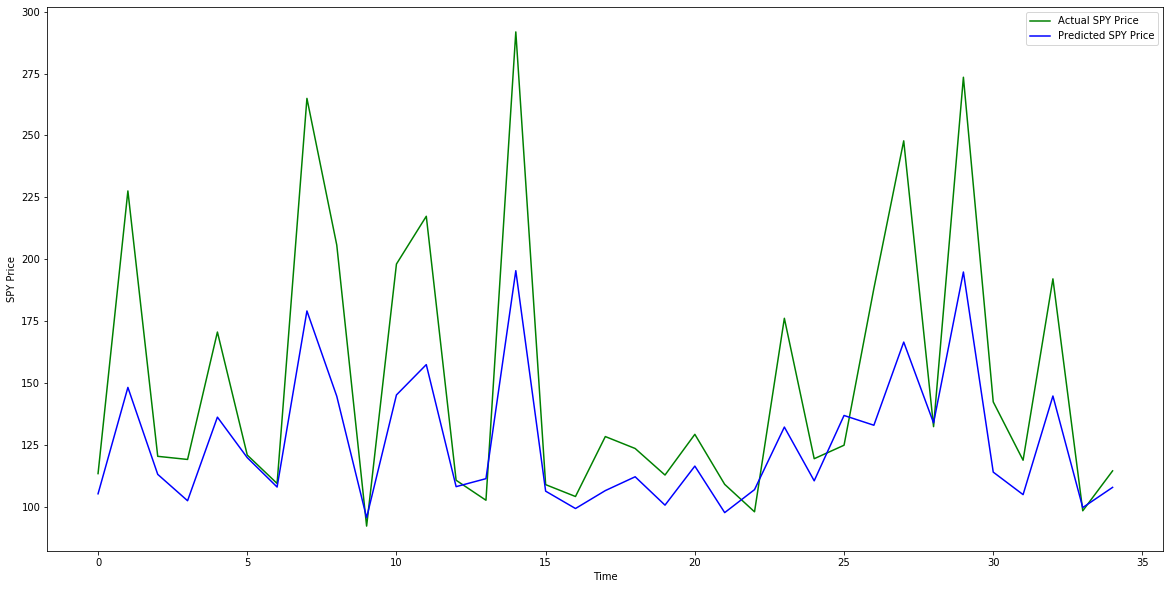

In [23]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision = 2)
x = (np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
plt.figure(figsize = (20,10))
plt.plot(y_test, color = 'Green', label = 'Actual SPY Price')
plt.plot(y_pred, color = 'Blue', label = 'Predicted SPY Price')
plt.xlabel('Time')
plt.ylabel('SPY Price')
plt.legend()



In [24]:
# Make a prediction

In [25]:
variables_predict = []
for i in variables:
    i_new = i + "_predict"
    variables_predict.append(i_new)
print(variables_predict)
    
    


['T10Y2Y_predict', 'HOUST_predict', 'PPIACO_predict', 'BAMLH0A0HYM2_predict', 'TEDRATE_predict', 'UNRATE_predict']


In [26]:
T10Y2Y_predict = 0.62
HOUST_predict = 1500
PPIACO_predict = 200
BAMLH0A0HYM2_predict = 4.9
TEDRATE_predict = 0.5
UNRATE_predict = 5.5

predict = []

for i in variables_predict:
    i_new = eval(i)
    predict.append(i_new)


#predict = np.array(predict)
print(predict)

predicted_value = ann.predict([[predict]])
print(predicted_value)
print((predicted_value - y[-1]) / y[-1])

[0.62, 1500, 200, 4.9, 0.5, 5.5]
[[173.36]]
[[-0.51]]


In [27]:
print(y_test)

[113.51 227.62 120.49 119.23 170.66 121.01 109.53 264.98 205.76  92.33
 198.11 217.39 110.83 102.76 291.81 109.06 104.27 128.47 123.65 112.94
 129.37 109.18  98.09 176.21 119.53 124.97 188.25 247.84 132.47 273.51
 142.47 118.91 192.13  98.51 114.62]
